In [33]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand,load_csv_dataset,load_traffic_dataset,load_excel_dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap, imd_1d_smap, imd_nd
import importlib
importlib.reload(imd_nd_smap)
importlib.reload(imd_1d_smap)

<module 'manifold_learning.imd_1d_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_1d_smap.py'>

In [21]:
from skpp import ProjectionPursuitRegressor

In [22]:
estimator = ProjectionPursuitRegressor(r=3)
aa = estimator.fit_transform(observables[:-30,:],observables[30:,:])

: 

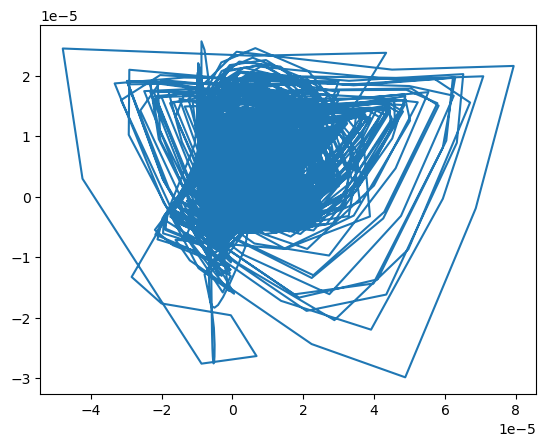

In [427]:
plt.plot(aa[:,0],aa[:,2])

In [2]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=3,)

X_c, Y_c = cca.fit_transform(observables[:-30], observables[30:])

NameError: name 'observables' is not defined

In [384]:
CCM.PairwiseCCM().compute(X_c[None],Y_c[None],1500,400,60,30,method="smap",theta=5,)


array([[[0.38564736]],

       [[0.26725405]],

       [[0.16401722]]], dtype=float32)

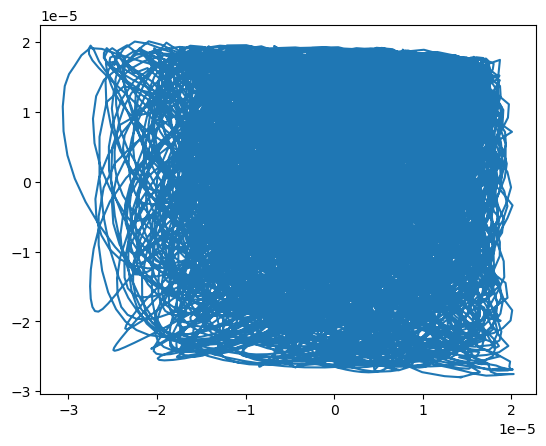

In [385]:
plt.plot(X_c[:,1],X_c[:,0])

In [57]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=4, subtract_corr=True, device="cpu")


In [157]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], embed_dim=3, embed_lag=20, n_components=4, subtract_corr=True, device="cpu")


In [123]:
W = trainer.find_iterative_solution_(observables, sample_len=200, library_len=1500, 
            exclusion_rad=90, theta=5, tp=90, 
            epochs=100, num_batches=32, tp_policy="fixed")


tensor(178.8785)
tensor(89.2491)
tensor(45.0226)
tensor(24.3582)
tensor(11.9980)
tensor(7.0916)
tensor(3.2280)
tensor(1.5433)
tensor(1.2953)
tensor(2.4491)
tensor(4.0501)
tensor(4.4713)
tensor(4.9261)
tensor(4.9097)
tensor(5.0612)
tensor(0.0386)
tensor(2.3635)
tensor(3.5669)
tensor(0.6470)
tensor(2.1339)
tensor(1.3538)
tensor(3.0503)
tensor(4.3663)
tensor(4.3001)
tensor(4.8117)
tensor(0.1110)
tensor(2.5048)
tensor(3.7816)
tensor(4.3887)
tensor(0.2712)
tensor(2.6190)
tensor(1.0694)
tensor(2.9339)


_LinAlgError: linalg.inv: (Batch element 0): The diagonal element 3 is zero, the inversion could not be completed because the input matrix is singular.

In [124]:
unmixed = observables @ W

NameError: name 'W' is not defined

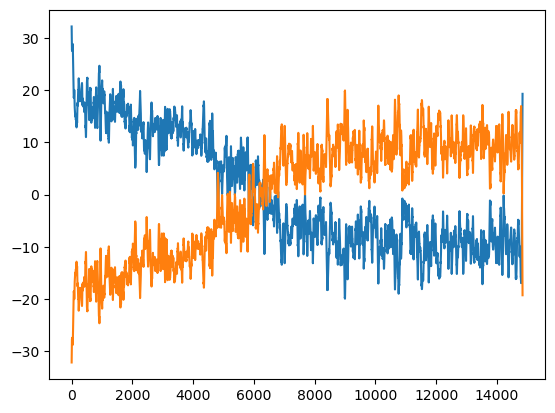

In [272]:
plt.plot(unmixed[:,:])

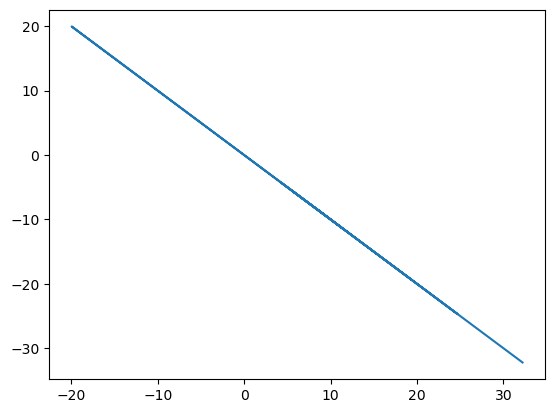

In [273]:
plt.plot(unmixed[:,0],unmixed[:,1])

In [255]:
CCM.PairwiseCCM().compute(unmixed[None],unmixed[None],1500,400,60,30,method="smap",theta=5,)


array([[[0.9509824 ]],

       [[0.95162445]]], dtype=float32)

In [173]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [174]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

observables = StandardScaler().fit_transform(X)

In [2]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]
#X = utils.get_td_embedding_np(X,5,20).reshape(-1,5*X.shape[1])

observables = StandardScaler().fit_transform(X)

In [3]:
observables_ = observables[4000:]
observables = observables[:4000]

In [569]:
X = load_csv_dataset("Trace_Hypo_Fish1_135658.csv").to_numpy()
pos = load_csv_dataset("spPosfiltered.csv").to_numpy()
y = X[200:,[-1]]
X =  X[200:,:-1]

observables = X
observables_min = observables.min()
observables = np.log((observables - observables_min + 1e-1))

sscaler = StandardScaler()
observables = sscaler.fit_transform(observables)
#ppca = PCA(whiten=False)
#observables = ppca.fit_transform(observables)

In [570]:
rr = np.argsort(PCA(1).fit_transform(pos).T[0])[:40]

In [571]:
observables = observables[:700,rr]

In [572]:
observables_ = observables[700:,rr]

/tmp/ipykernel_513475/659187699.py:1: DeprecationWarning: Out of bound index found. This was previously ignored when the indexing result contained no elements. In the future the index error will be raised. This error occurs either due to an empty slice, or if an array has zero elements even before indexing.
(Use `warnings.simplefilter('error')` to turn this DeprecationWarning into an error and get more details on the invalid index.)
  observables_ = observables[700:,rr]


In [127]:
X_ = load_csv_dataset("Trace_Normo_Fish1_133105.csv").to_numpy()
y_ = X_[200:,[-1]]
X_ =  X_[200:,:-1]

observables_ = X_
observables_ = np.log((observables_ - observables_min + 1e-1))

observables_ = sscaler.transform(observables_)

#observables_ = ppca.transform(observables_)

In [175]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [493]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(10)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [494]:
A =  (np.random.normal(0,1,(360,360)) * (((360-np.abs(np.arange(360)[:,None] - np.arange(360)[None]))/360)**2))
observables = observables @ A

In [217]:
observables = observables @ np.random.normal(0,0.1,(360,360))

In [6]:
observables = np.concatenate([observables, np.random.normal(0,1,(observables.shape[0],30))],axis=1)

In [131]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=5, n_components=10, subtract_corr=True, device="cuda")


In [218]:
trainer = imd_1d_smap.IMD_1D_smap(observables.shape[1], embed_dim=7, embed_lag=7, n_components=1, subtract_corr=True, device="cuda")


In [132]:
trainer.fit(observables, sample_len=150, library_len=800, 
            exclusion_rad=30, theta=5, tp=120, 
            epochs=500, num_batches=32,optimizer="Adam", learning_rate=0.01, tp_policy="range",loss_mask_size=3)


Epoch 1/500, Loss: 1.2996
Epoch 2/500, Loss: 1.2112
Epoch 3/500, Loss: 1.1558
Epoch 4/500, Loss: 1.1290
Epoch 5/500, Loss: 1.1248
Epoch 6/500, Loss: 1.1070
Epoch 7/500, Loss: 1.0764
Epoch 8/500, Loss: 1.0838
Epoch 9/500, Loss: 1.0287
Epoch 10/500, Loss: 1.0294
Epoch 11/500, Loss: 1.0111
Epoch 12/500, Loss: 1.0167
Epoch 13/500, Loss: 0.9867
Epoch 14/500, Loss: 0.9643
Epoch 15/500, Loss: 0.9735
Epoch 16/500, Loss: 0.9694
Epoch 17/500, Loss: 0.9416
Epoch 18/500, Loss: 0.9278
Epoch 19/500, Loss: 0.9323
Epoch 20/500, Loss: 0.9218
Epoch 21/500, Loss: 0.9074
Epoch 22/500, Loss: 0.8949
Epoch 23/500, Loss: 0.9163
Epoch 24/500, Loss: 0.8945
Epoch 25/500, Loss: 0.8900
Epoch 26/500, Loss: 0.8967
Epoch 27/500, Loss: 0.8857
Epoch 28/500, Loss: 0.8720
Epoch 29/500, Loss: 0.8812
Epoch 30/500, Loss: 0.8668
Epoch 31/500, Loss: 0.8723
Epoch 32/500, Loss: 0.8432
Epoch 33/500, Loss: 0.8565
Epoch 34/500, Loss: 0.8530
Epoch 35/500, Loss: 0.8232
Epoch 36/500, Loss: 0.8268
Epoch 37/500, Loss: 0.8338
Epoch 38/5

KeyboardInterrupt: 

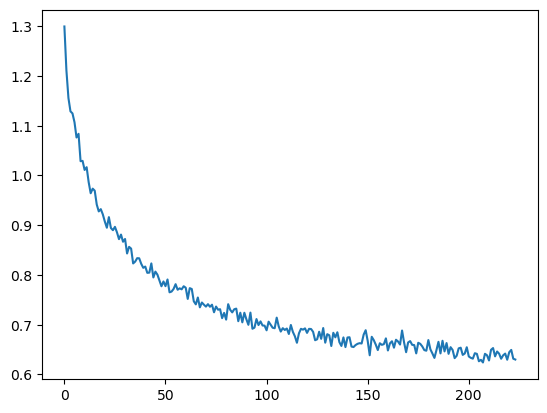

In [133]:
plt.plot(trainer.get_loss_history()[:])


In [134]:

unmixed = trainer.predict(observables)
unmixed_ = trainer.predict(observables_)

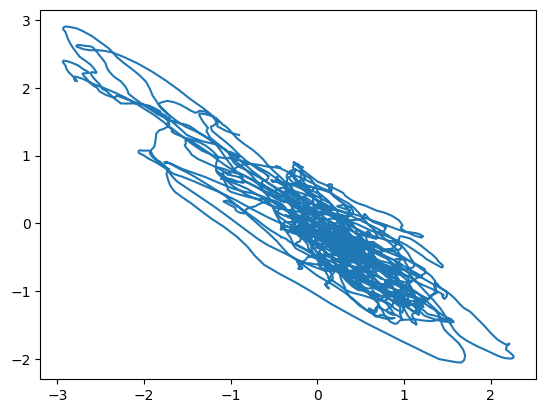

In [135]:
plt.plot(unmixed[:,0,1],unmixed[:,0,0])

In [145]:
plt.plot((observables @ ppca.components_)[:,999],X[:,999])

NameError: name 'ppca' is not defined

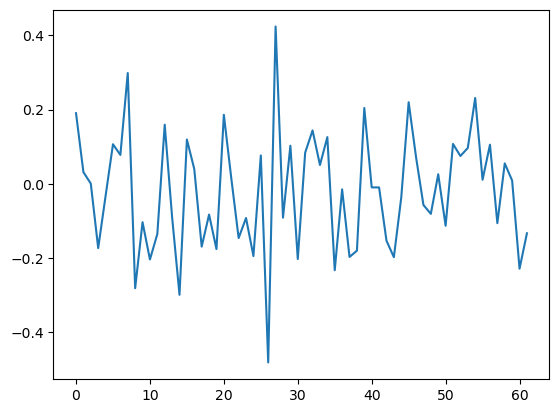

In [136]:
plt.plot(trainer.model.get_weights()[:,1][:,4])

In [38]:

plt.figure(figsize=(6,10))
plt.imshow(np.linalg.pinv(trainer.model.get_weights()[:,3].T),aspect="auto",interpolation="nearest")
plt.colorbar()

IndexError: index 3 is out of bounds for axis 1 with size 1

<Figure size 600x1000 with 0 Axes>

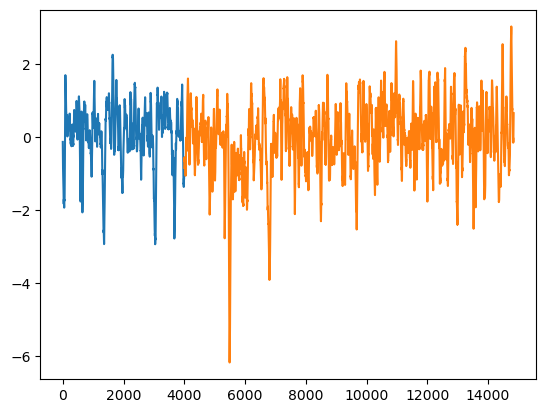

In [137]:

plt.plot(unmixed[:,0,1])
plt.plot(np.arange(unmixed.shape[0],unmixed.shape[0]+unmixed_.shape[0]),unmixed_[:,0,1])
#plt.plot(PCA(1).fit_transform(X)/2+10)

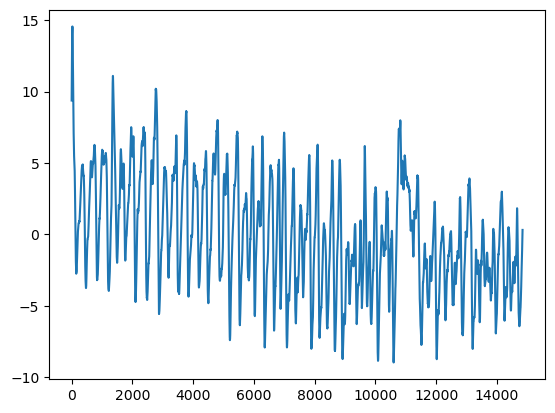

In [138]:
plt.plot(PCA(1).fit_transform(X))

In [134]:
plt.plot((observables @ ppca.components_)[:,2])

NameError: name 'ppca' is not defined

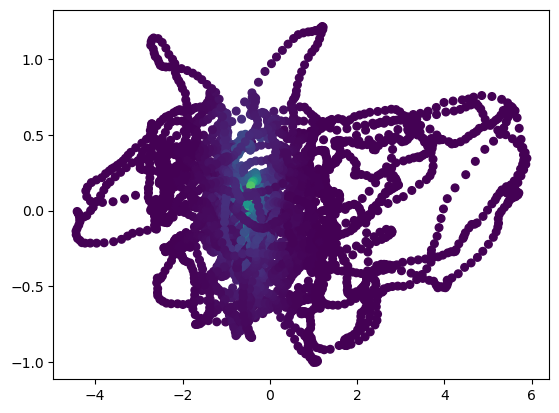

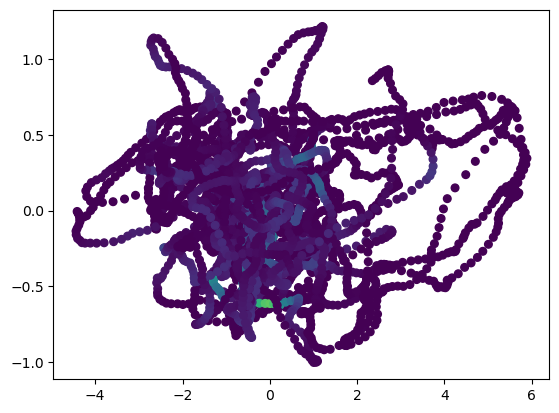

In [139]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(unmixed[:,0][[210]],unmixed[:,0])[0]
weights = np.exp(-(5*dist/dist.mean()))

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[:-20,0],x_pca[:-20,1],c=weights[:-20],s=30)
plt.show()

x_pca = PCA(2).fit_transform(unmixed[:,0,:])
plt.scatter(x_pca[20:,0],x_pca[20:,1],c=weights[:-20],s=30)

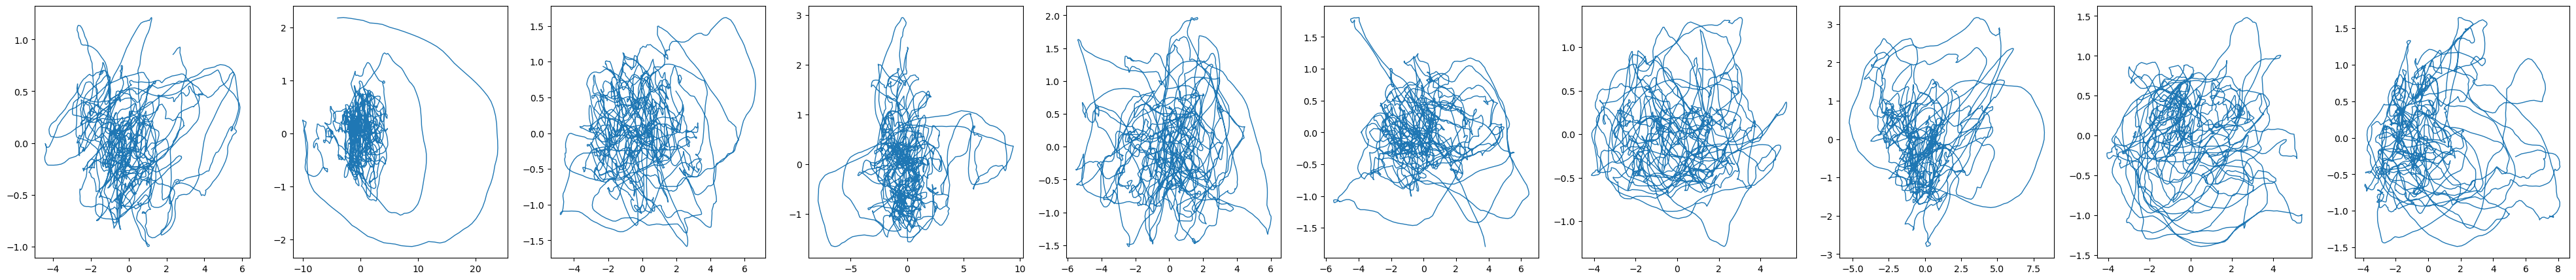

In [140]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

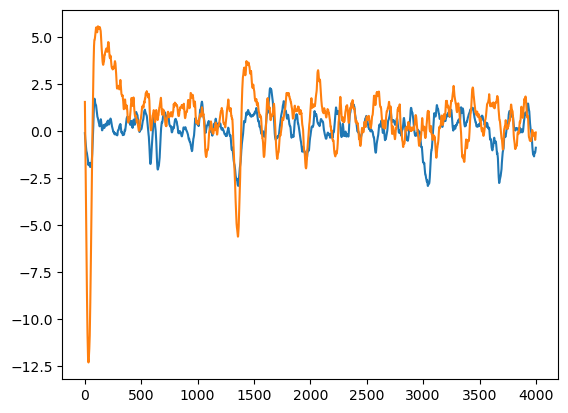

In [141]:
plt.plot(unmixed[:,0][:,1])
plt.plot(unmixed[:,1][:,1])

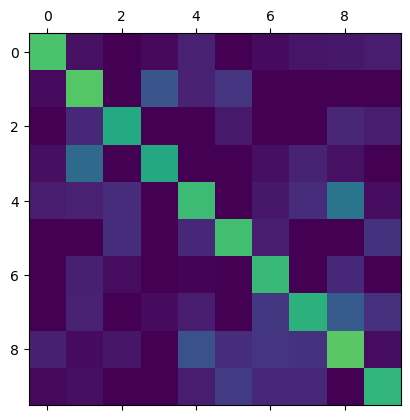

In [142]:
ccm_matrix_unmixed = CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,60,method="simplex",nbrs_num=15,).mean(axis=0)
plt.matshow(ccm_matrix_unmixed,vmin=0,vmax=1)

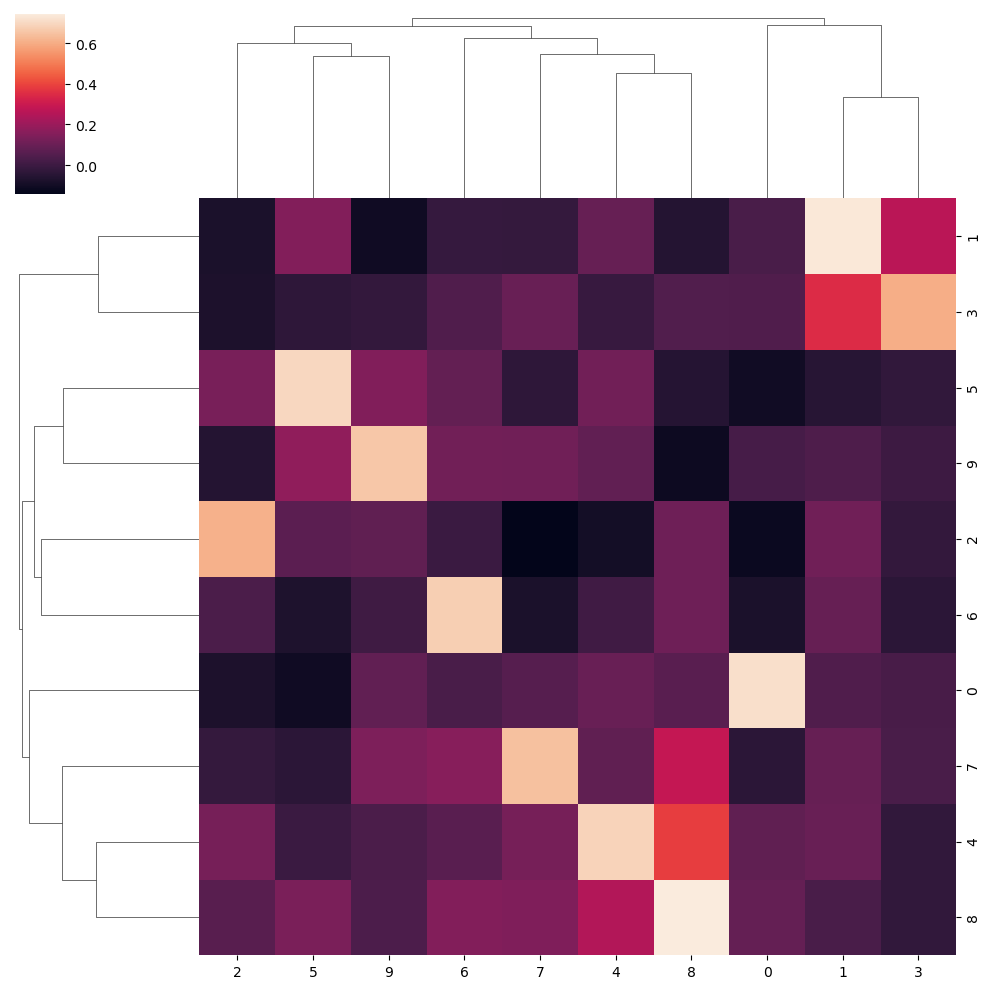

In [143]:
import seaborn as sns
sns.clustermap(ccm_matrix_unmixed)

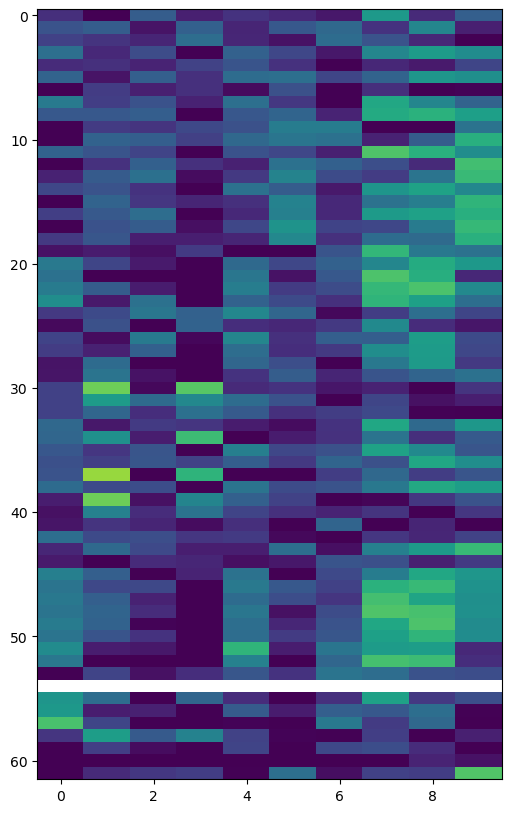

In [170]:
plt.figure(figsize=(6,10))
unmixed_xmap_X = [np.mean([CCM.PairwiseCCM().compute(np.transpose(unmixed[:,[i]],axes=(1,0,2)),observables.T[:,:,None],1200,600,60,0,method="simplex",nbrs_num=15,).mean(axis=0) for exp in range(5)] ,axis=0) for i in range(unmixed.shape[1])]
unmixed_xmap_X = np.array(unmixed_xmap_X).T[0]
plt.imshow(unmixed_xmap_X,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

In [52]:
CCM.PairwiseCCM().compute(np.transpose(unmixed_[:,[0]],axes=(1,0,2)),observables_.T[[38],:,None],1200,600,60,0,method="simplex",nbrs_num=15,).mean(axis=0)


array([[0.6597541]], dtype=float32)

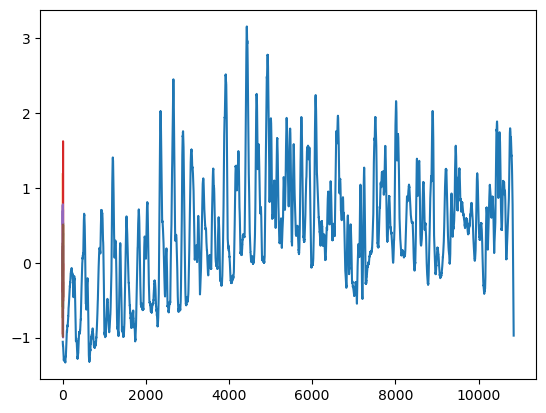

In [145]:
plt.plot(observables_[:,3])
plt.plot(trainer.get_prediction(observables,observables_,theta=5,exclusion_rad=30,tp=1)[0][:,3])


In [167]:
gen_observ = []
ttp = 30
temp = observables[-ttp:]
for i in range(int(3000/ttp)):
    temp = trainer.get_prediction(observables[:-ttp*2],temp,theta=5,exclusion_rad=30,tp=ttp)[1]
    gen_observ += [temp]
gen_observ = np.concatenate(gen_observ)

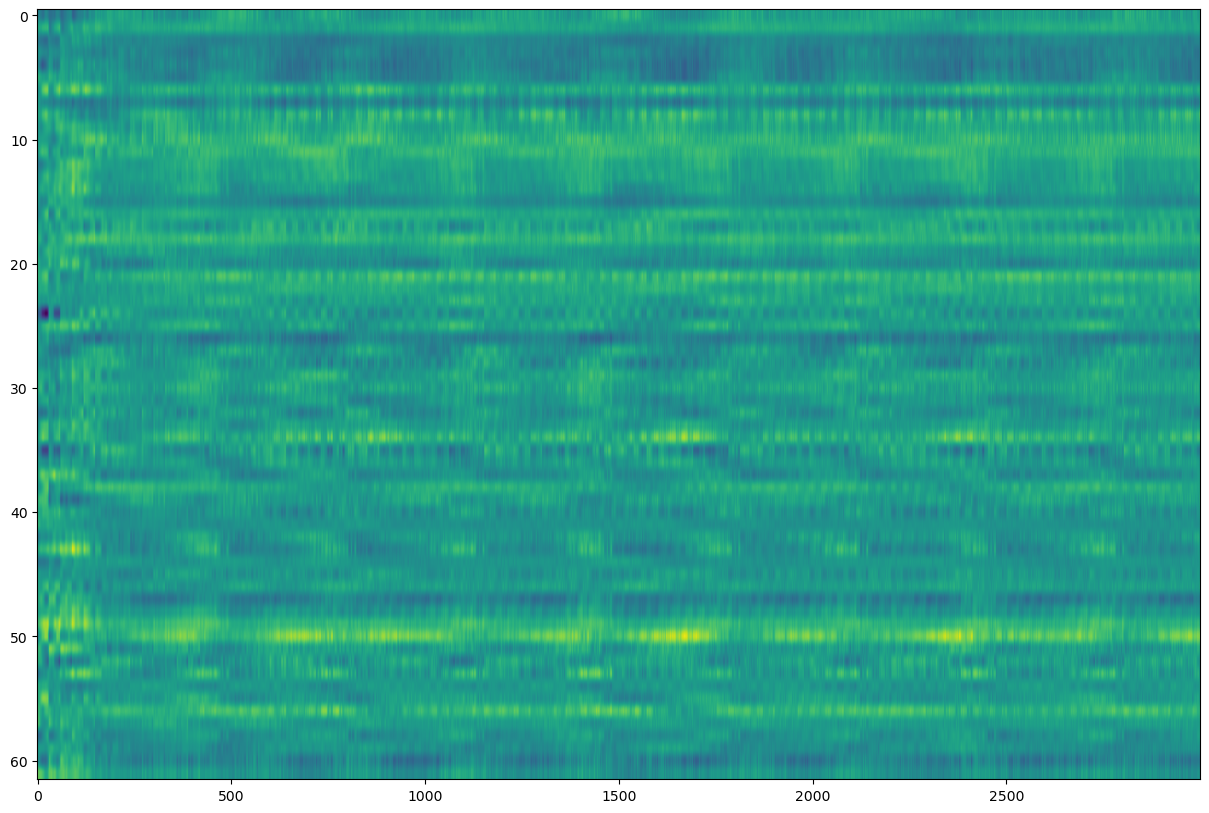

In [168]:

plt.figure(figsize=(15,10))
plt.imshow(gen_observ.T,aspect="auto")

(0.0, 1000.0)

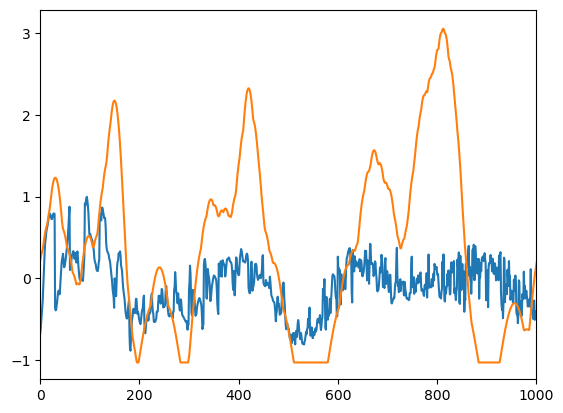

In [169]:
plt.plot(gen_observ[:,33])
plt.plot(observables_[:gen_observ.shape[0],33])
plt.xlim(0,1000)

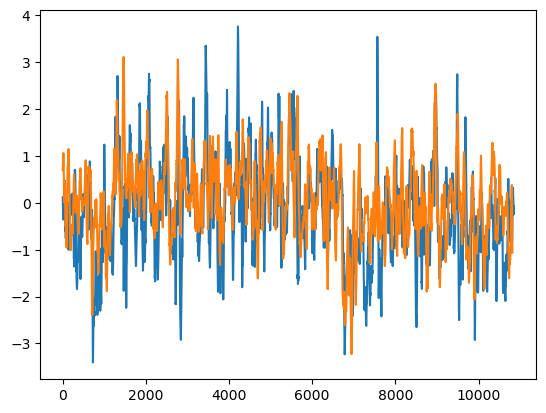

In [157]:
plt.plot(trainer.get_prediction(observables,observables_,theta=5,exclusion_rad=30,tp=30)[0][0,:,0])
plt.plot(unmixed_[30:,0,0])

In [17]:
import torch 
torch.permute(A,(1,2,0)).shape

torch.Size([10846, 5, 3])

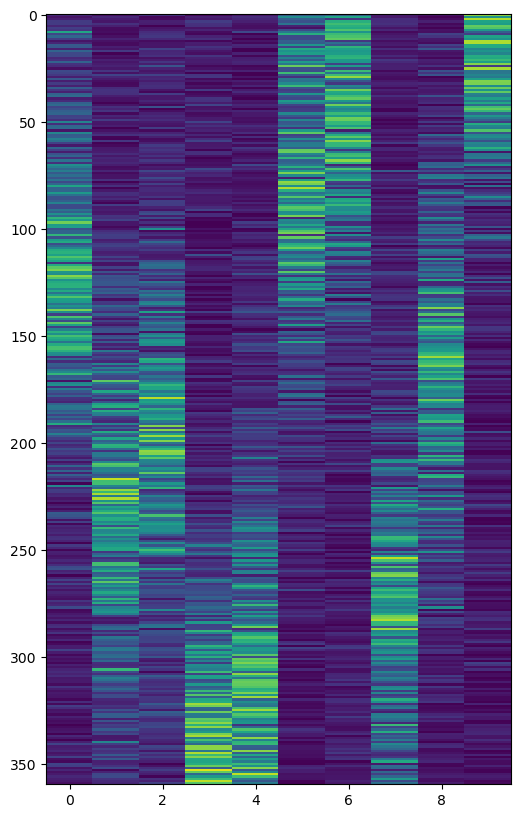

In [396]:
plt.figure(figsize=(6,10))
unmixed_xmap_X = [np.mean([CCM.PairwiseCCM().compute(np.transpose(unmixed[:,[i]],axes=(1,0,2)),observables.T[:,:,None],1200,600,60,0,method="simplex",nbrs_num=15,).mean(axis=0) for exp in range(5)] ,axis=0) for i in range(unmixed.shape[1])]
unmixed_xmap_X = np.array(unmixed_xmap_X).T[0]
plt.imshow(unmixed_xmap_X,vmin=0,vmax=1,aspect="auto",interpolation="nearest")

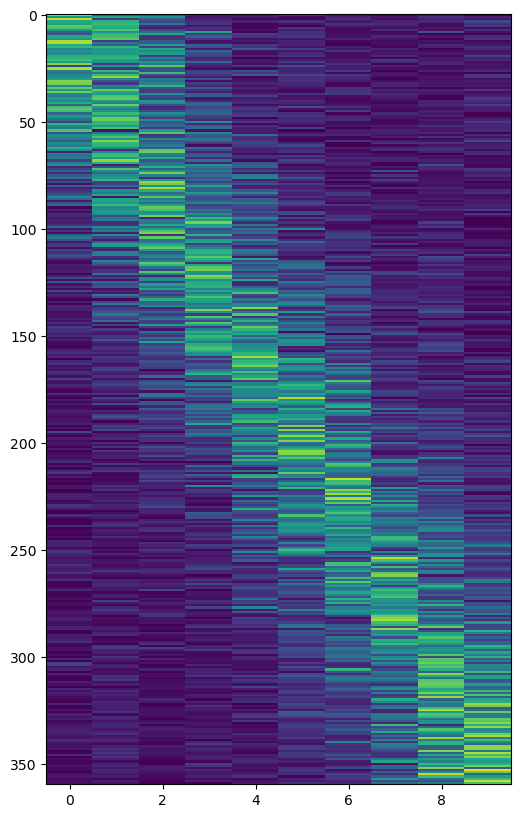

In [404]:

plt.figure(figsize=(6,10))
unmixed_xmap_X = [np.mean([CCM.PairwiseCCM().compute(np.transpose(unmixed[:,[i]],axes=(1,0,2)),observables.T[:,:,None],1200,600,60,0,method="simplex",nbrs_num=15,).mean(axis=0) for exp in range(5)] ,axis=0) for i in range(unmixed.shape[1])]
unmixed_xmap_X = np.array(unmixed_xmap_X).T[0]
plt.imshow(unmixed_xmap_X[:,[9,6,5,0,8,2,1,7,4,3]],vmin=0,vmax=1,aspect="auto",interpolation="nearest")

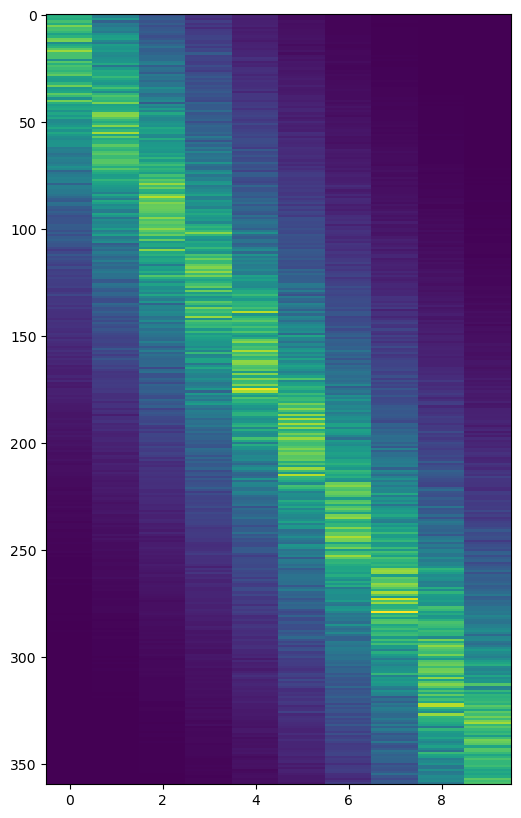

In [409]:


plt.figure(figsize=(6,10))
plt.imshow(np.abs(A.reshape(-1,10,36)).mean(axis=2),aspect="auto",interpolation="nearest")

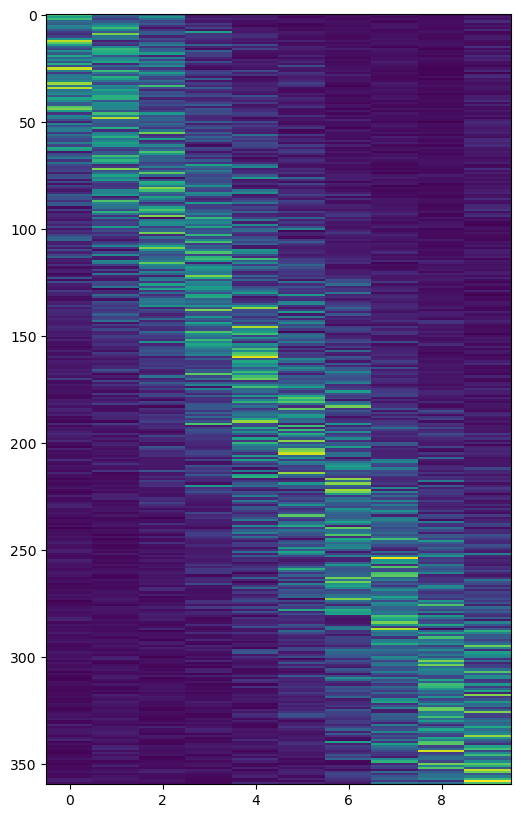

In [446]:


plt.figure(figsize=(6,10))
plt.imshow(np.array([np.abs(np.corrcoef((unmixed[:,i]).T,observables.T)[0:5,5:].T) for i in [9,6,5,0,8,2,1,7,4,3]]).mean(axis=2).T,aspect="auto",interpolation="nearest")

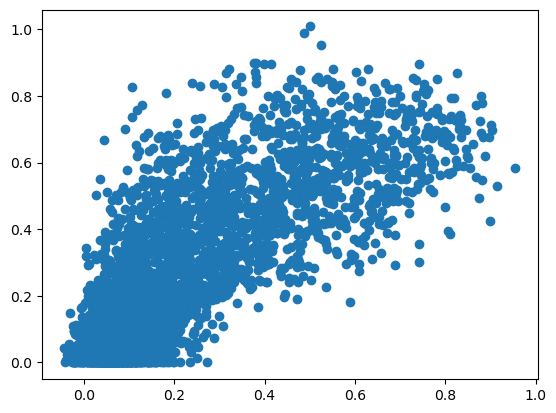

In [412]:
plt.scatter(unmixed_xmap_X[:,[9,6,5,0,8,2,1,7,4,3]].flatten(),np.abs(A.reshape(-1,10,36)).mean(axis=2).flatten())

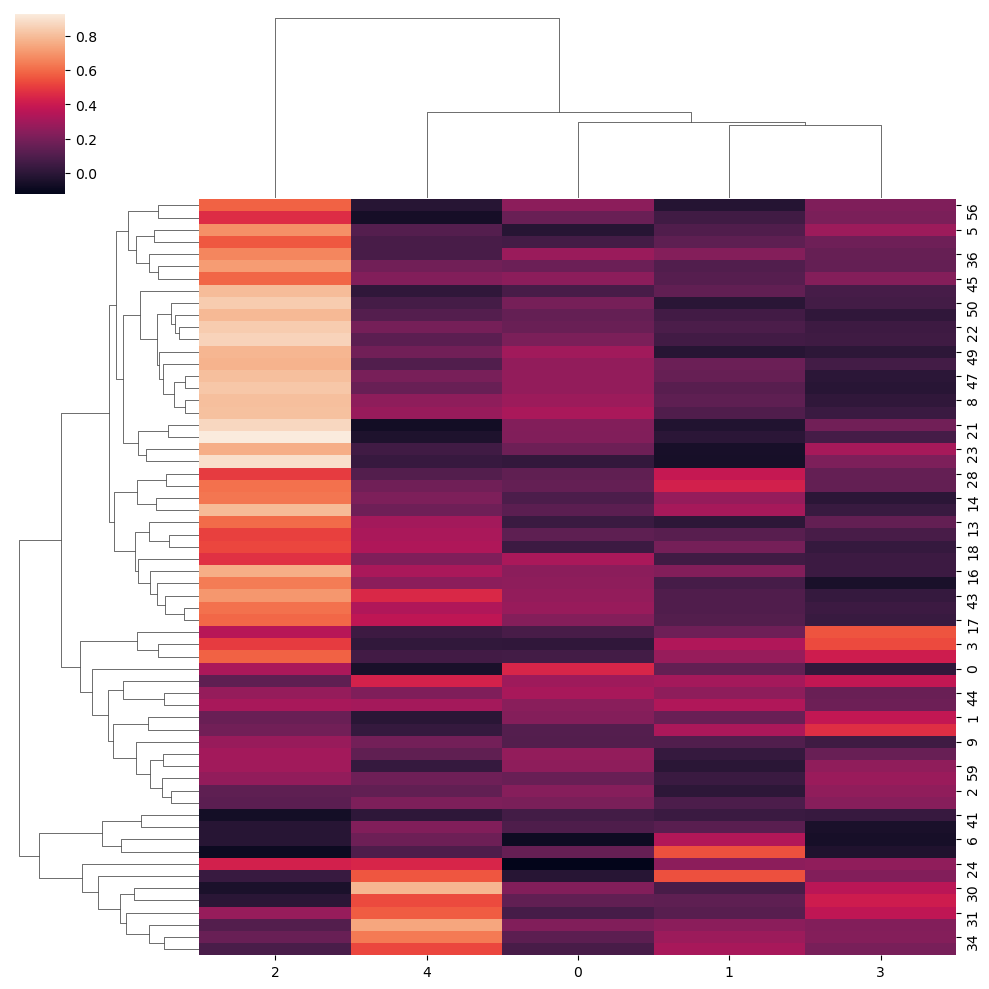

In [18]:
import seaborn as sns
sns.clustermap(unmixed_xmap_X)

In [165]:
np.argsort(unmixed_xmap_X[:,1])[::-1][:20]

array([13512, 36518, 36455, 13528, 25887, 23543, 28872, 38092, 27835,
       20749, 31716, 42502, 24431, 19882, 30356, 29181, 34151, 38604,
       26218, 24341])

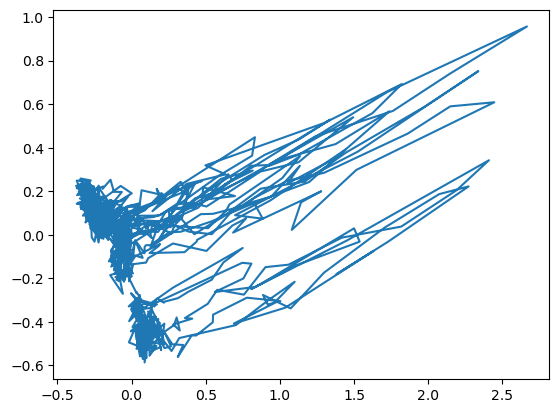

In [138]:
plt.plot(*PCA(2).fit_transform(X[:,np.argsort(unmixed_xmap_X[:,0])[::-1][:20]]).T)

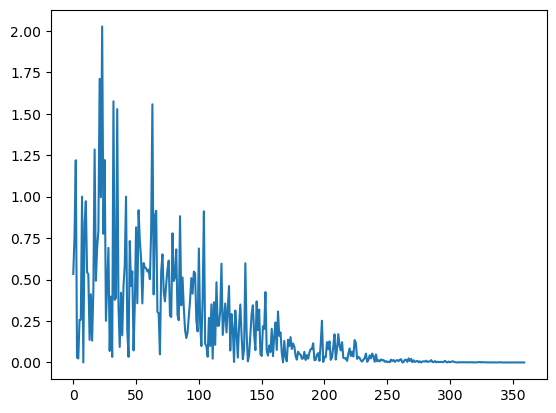

In [384]:
plt.plot(np.abs(A[32]))

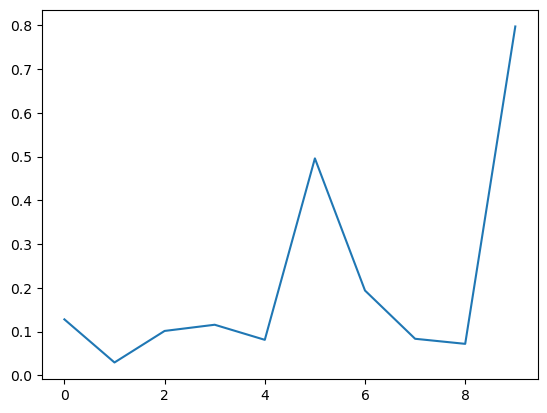

In [383]:
plt.plot(unmixed_xmap_X[32])

In [361]:

plt.figure(figsize=(10,10))
plt.plot(2*X[:,np.argsort(unmixed_xmap_X[:,1])[::-1][:30]]-np.arange(30))
plt.plot(unmixed[:,1][:,2]/500+5)

IndexError: index 115 is out of bounds for axis 1 with size 3

<Figure size 1000x1000 with 0 Axes>

In [360]:
plt.plot(X[:700,38])
plt.plot(X[:700,36518])


IndexError: index 38 is out of bounds for axis 1 with size 3

In [359]:
np.argsort(unmixed_xmap_X.sum(axis=1))[:50]

array([162,  20,  10, 151,  27, 147, 149, 179, 172, 169,  15, 168,  60,
        26, 160,  82, 166, 175,   8,  96,   5, 171,   4, 173, 110, 174,
         2,  34,  18, 164,  44,  19,  13,  77, 163,  23,   9,  35, 176,
       131,  25,  56,  21,  31, 152, 145,  38, 154, 114, 138])

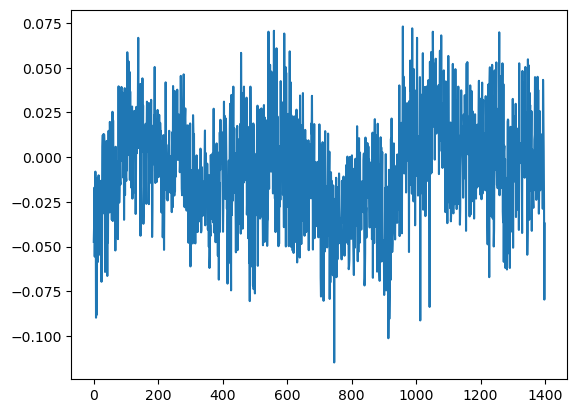

In [1284]:
plt.plot(X[:,229])

ValueError: 'c' argument has 360 elements, which is inconsistent with 'x' and 'y' with size 53051.

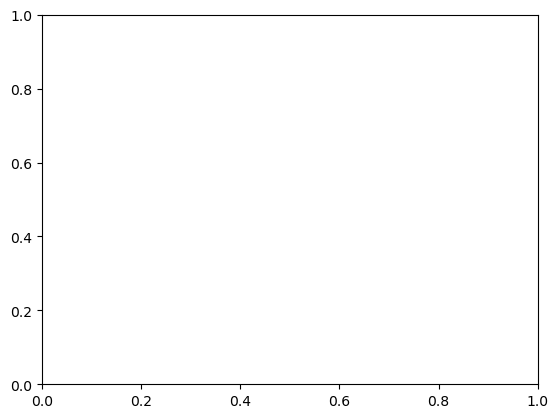

In [557]:
plt.scatter(pos[:,0],pos[:,1],s=1,c=unmixed_xmap_X.sum(axis=1),vmin=0)
plt.colorbar()

In [208]:

plt.scatter(pos[:,0],pos[:,1],s=1,c=((trainer.model.get_weights()[:,0]).T @ ppca.components_)[2],vmin=0)
plt.colorbar()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1400 is different from 53051)

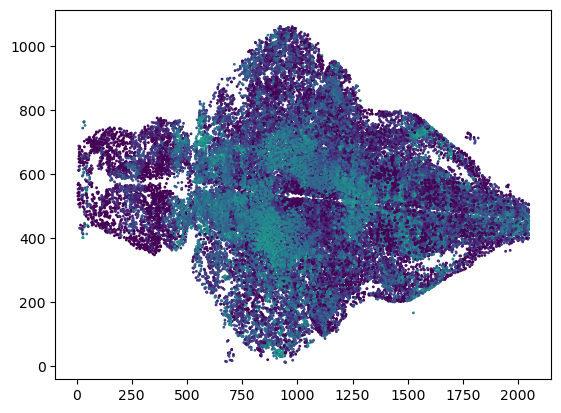

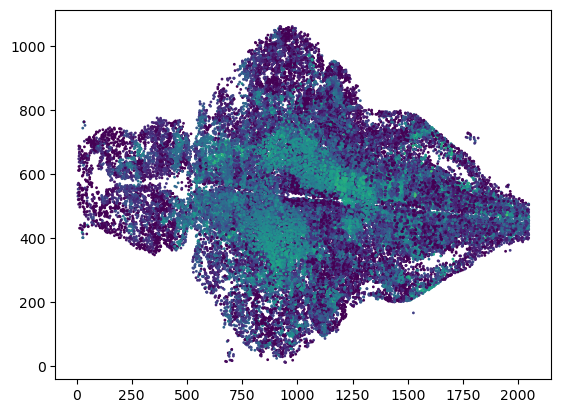

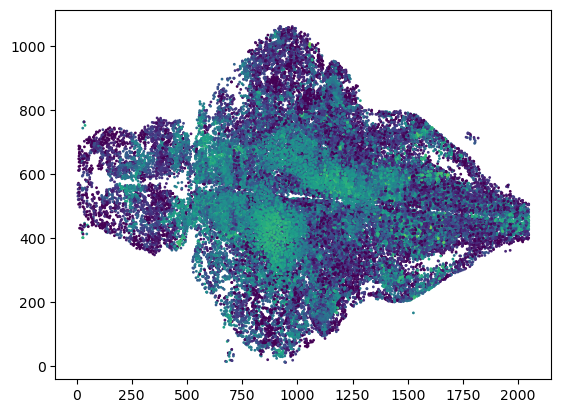

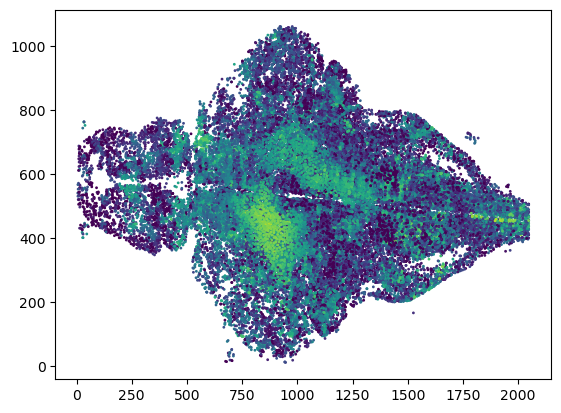

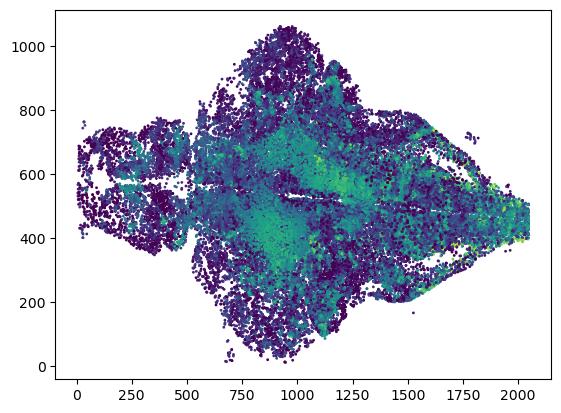

In [172]:
for u in unmixed_xmap_X.T:
    plt.scatter(pos[:,0],pos[:,1],s=1,c=u,vmax=1,vmin=0)
    plt.show()

In [138]:
CCM.PairwiseCCM().compute(observables[:,unmixed_xmap_X[:,0] > 0.7][None],np.transpose(unmixed,axes=(1,0,2)),15000,300,60,0,method="simplex",nbrs_num=15,).mean(axis=0)


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1600 but corresponding boolean dimension is 53052

In [44]:
CCM.PairwiseCCM().compute(observables[:,unmixed_xmap_X[:,1] > 0.5][None],np.transpose(unmixed,axes=(1,0,2)),15000,300,60,0,method="simplex",nbrs_num=15,).mean(axis=0)


IndexError: index 1 is out of bounds for axis 1 with size 1

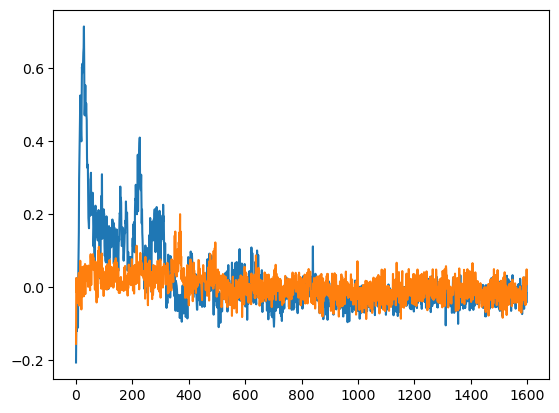

In [139]:

plt.plot(X[:,0])
plt.plot(X[:,34])

In [850]:
import plotly.express as px
x_pca = PCA(3).fit_transform(unmixed[:,2,:])
fig = px.line_3d(x=x_pca[:,0], y=x_pca[:,1],z=x_pca[:,2],height=700)

fig.show()

In [229]:
fig = px.line_3d(x=unmixed[:,1,0], y=unmixed[:,1,1],z=unmixed[:,1,2],height=700)

fig.show()

In [509]:
vars = []
for j in range(10):
    trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=3, n_components=3, subtract_corr=True, device="cuda")
    trainer.fit(observables, sample_len=80, library_len=800, 
            exclusion_rad=90, theta=4, tp=90, 
            epochs=300, num_batches=32, optimizer="Adagrad", learning_rate=0.02, tp_policy="range")

    unmixed = trainer.predict(observables)
    vars += [np.transpose(unmixed,(1,0,2))]
vars = np.concatenate(vars)
plt.matshow(CCM.PairwiseCCM().compute(vars,vars,1500,400,60,30,90,False).mean(axis=0),vmin=0,vmax=1)

Epoch 1/300, Loss: 1.2159
Epoch 2/300, Loss: 1.4649
Epoch 3/300, Loss: 1.3613
Epoch 4/300, Loss: 1.3013
Epoch 5/300, Loss: 1.2649
Epoch 6/300, Loss: 1.1351
Epoch 7/300, Loss: 1.1806
Epoch 8/300, Loss: 1.0274
Epoch 9/300, Loss: 1.0938
Epoch 10/300, Loss: 0.9522
Epoch 11/300, Loss: 0.9704
Epoch 12/300, Loss: 0.9978
Epoch 13/300, Loss: 0.9149
Epoch 14/300, Loss: 0.9327
Epoch 15/300, Loss: 0.8954
Epoch 16/300, Loss: 0.9002


KeyboardInterrupt: 

In [54]:
[utils.calculate_correlation_dimension(unmixed[np.random.randint(0,unmixed.shape[0],1000),i],device="cuda") for i in range(unmixed.shape[1])]

[3.161627769470215,
 3.035858154296875,
 3.163102865219116,
 2.910153865814209,
 3.044713020324707,
 3.022183656692505,
 3.0095221996307373,
 2.8416285514831543,
 2.9751992225646973,
 2.8640193939208984,
 2.927274703979492,
 3.086731433868408,
 3.027596950531006,
 2.5791797637939453,
 3.1672067642211914,
 3.025742292404175,
 2.228558301925659,
 2.5037970542907715,
 2.792874336242676,
 2.8774242401123047]

In [53]:
[utils.calculate_rank_for_variance(unmixed[np.random.randint(0,unmixed.shape[0],5000),i],0.95) for i in range(unmixed.shape[1])]


[4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 4, 5]